# 3 Graph signals

A graph signal is a function $\mathcal{V} \rightarrow \mathbb{R}$ that associates a value to each node $v \in \mathcal{V}$ of a graph. The signal values can be represented as a vector $f \in \mathbb{R}^N$ where $N = |\mathcal{V}|$ is the number of nodes in the graph.

In [1]:
import numpy as np
from pygsp import graphs

Let's generate a graph and a random signal.

In [2]:
graph = graphs.Sensor(N=100)
signal = np.random.normal(size=graph.N)

We can now plot the signal on the graph to visualize it and see that it's indeed random.

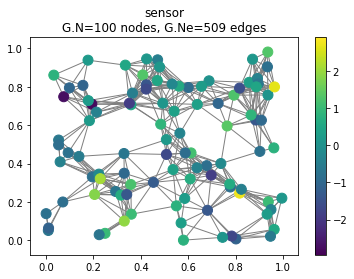

In [4]:
graph.plot_signal(signal)

## 3.1 Gradient and divergence

The gradient $\nabla_\mathcal{G} \ f$ of the signal $f$ on the graph $\mathcal{G}$ is a signal on the edges defined as

$$(\nabla_\mathcal{G})_{(i,j)} \ f = \sqrt{W_{ij}} (f_i - f_j)$$

In [ ]:
graph.compute_differential_operator()
gradient = graph.D @ signal
assert gradient.size == graph.Ne

Similarly, we can compute the divergence of an edge signal, which is again a signal on the nodes.

$$(\operatorname{div}_\mathcal{G} x)_i = \sum_{j \sim i} \sqrt{W_{ij}} x_{(i,j)}$$

In [ ]:
divergence = graph.D.T @ gradient
assert divergence.size == graph.N

In [ ]:
graph.plot_signal(divergence)

The Laplacian operator is indeed the divergence of the gradient.

In [ ]:
np.testing.assert_allclose(graph.L @ signal, divergence)

## 3.2 Smoothness

The smoothness of a signal can be computed by the quadratic form

$$ f^\intercal L f = \sum_{i \sim j} W_{ij} (f_i - f_j)^2 $$

In [ ]:
signal.T @ graph.L @ signal

## 3.3 Exercise

What is the smoothest graph signal, i.e. the signal $f$ for which $f^\intercal L f = 0$? Verify computationally.

In [ ]:
# Your code here.

What if $L$ is the normalized Laplacian? Verify computationally.

In [ ]:
graph.compute_laplacian('normalized')

# Your code here.